# NDVI

This notebook is performing a NDVI computation on a full Landsat image inserted in the Data Cube.

First... we do all the necessary imports !

In [1]:
%matplotlib inline
# necessary for plot display in jupyter

from datetime import date
import json
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
#import ogr
#import pandas
from datacube.api.model import DatasetType, Satellite, BANDS
from datacube.api.query import list_tiles_as_list
from datacube.api.utils import get_dataset_data, get_dataset_metadata
from eotools.tiling import generate_tiles
from eotools.coordinates import convert_coordinates
#from idl_functions import histogram
#from idl_functions import hist_equal
#from idl_functions import label_region
#from image_processing.segmentation import SegmentVisitor

We define all the parameters we want to retrieve the data

In [2]:
dataset_types = [DatasetType.NDVI]
min_date = date(2015, 01, 01)
max_date = date(2015, 12, 31)
satellites = [Satellite(i) for i in ['LS7']]
x_cell = [152,153,154]
y_cell = [-26,-27]

We request the tiles according to the parameters and we check that we have the 6 tiles corresponding to our Landsat image

In [3]:
tiles = list_tiles_as_list(x=x_cell, y=y_cell, acq_min=min_date,
                           acq_max=max_date,
                           satellites=satellites,
                           dataset_types=dataset_types)

In [4]:
print "Number of time periods: {}".format(len(tiles))

Number of time periods: 6


In [5]:
nbar_ds = tiles[0].datasets[DatasetType.ARG25]
metadata = get_dataset_metadata(nbar_ds)
samples, lines = metadata.shape
print "Array dimensions:\nx: {x} & y: {y}".format(x=samples, y=lines)

Array dimensions:
x: 4000 & y: 4000


In [6]:
print metadata.transform

(152.0, 0.00025, 0.0, -26.0, 0.0, -0.00025)


We let the Data Cube compute the NDVI from RED and NIR bands. And we display NDVI for each tile we have.

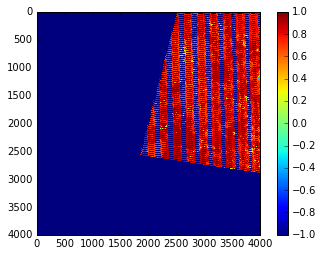

In [7]:
ds = tiles[0].datasets[DatasetType.NDVI]
data = get_dataset_data(ds)
matrix = np.reshape(data.get(data.keys()[0]), (-1, 4000))
plt.imshow(matrix,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar()

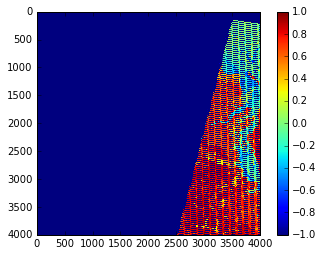

In [8]:
ds = tiles[1].datasets[DatasetType.NDVI]
data = get_dataset_data(ds)
matrix = np.reshape(data.get(data.keys()[0]), (-1, 4000))
plt.imshow(matrix,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar()

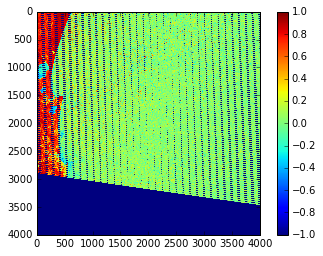

In [9]:
ds = tiles[2].datasets[DatasetType.NDVI]
data = get_dataset_data(ds)
matrix = np.reshape(data.get(data.keys()[0]), (-1, 4000))
plt.imshow(matrix,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar()

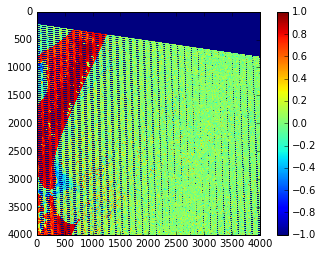

In [12]:
ds = tiles[3].datasets[DatasetType.NDVI]
data = get_dataset_data(ds)
matrix = np.reshape(data.get(data.keys()[0]), (-1, 4000))
plt.imshow(matrix,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar()

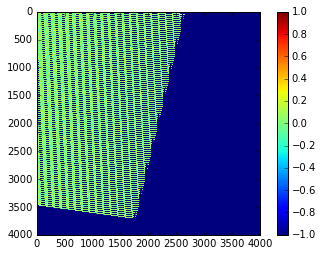

In [13]:
ds = tiles[4].datasets[DatasetType.NDVI]
data = get_dataset_data(ds)
matrix = np.reshape(data.get(data.keys()[0]), (-1, 4000))
plt.imshow(matrix,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar()

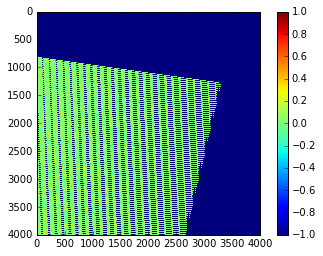

In [14]:
ds = tiles[5].datasets[DatasetType.NDVI]
data = get_dataset_data(ds)
matrix = np.reshape(data.get(data.keys()[0]), (-1, 4000))
plt.imshow(matrix,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar()

Here is the code we would execute to perform the same operation on the full image using GDAL. But due to memory limitations, we cannot execute this cell.

In [19]:
#from osgeo import gdal
#driver = gdal.GetDriverByName('GTiff')
#file_name = "/data/agdc/LS7_ETM_NBAR_P54_GANBAR01-002_089_078_20150425/scene01/LS7_ETM_NBAR_P54_GANBAR01-002_089_078_20150425_B40.tif"
#dataset = gdal.Open(file_name)
#band_red = dataset.GetRasterBand(1).ReadAsArray()
#file_name = "/data/agdc/LS7_ETM_NBAR_P54_GANBAR01-002_089_078_20150425/scene01/LS7_ETM_NBAR_P54_GANBAR01-002_089_078_20150425_B50.tif"
#dataset = gdal.Open(file_name)
#band_nir = dataset.GetRasterBand(1).ReadAsArray()
#ndvi = (band_nir-band_red)/(band_nir+band_red)
#plt.matshow(ndvi,cmap=plt.cm.jet, vmin=-1, vmax=1)
#plt.colorbar(shrink=0.8)
